# Examples
##### Some usage examples and ways to make the figure better than what default options yield.

First import stuff

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # Matplotlib 2.0 shown here
from adjustText import adjust_text
import numpy as np
import pandas as pd

#### A very simple example also shown in the wiki to simply introduce the call signature of `adjust_text`

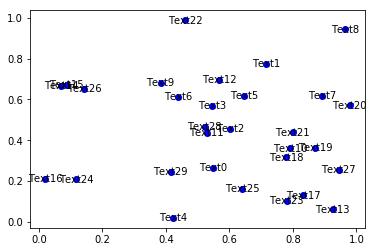

In [2]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]

24

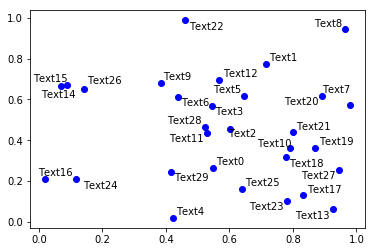

In [3]:
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]
adjust_text(texts)

24

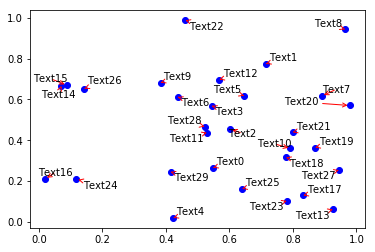

In [4]:
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

##### First a very simple example with labelling one point out of many

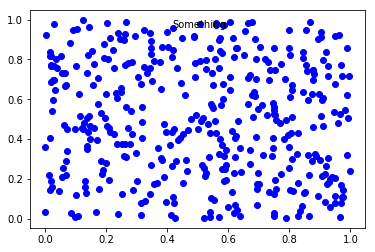

In [5]:
def plot_scatter(adjust=False):
    np.random.seed(1)
    x, y = np.random.random((2,400))

    fig, ax = plt.subplots()
    ax.plot(x, y, 'bo')

    texts = [plt.text(x[0], y[0], 'Something')]
    if adjust:
        plt.title(str(
                  adjust_text(texts, x, y, arrowprops=dict(arrowstyle='->', color='red'))
                      )+' iterations')
_ = plot_scatter()

As you can see, the label overlaps many points here and it is difficult to understand, what it says. Also it is not clear which of the points it corresponds to. Let's try to asjust its location with default parameters while adding an arrow to connect it to the original point.

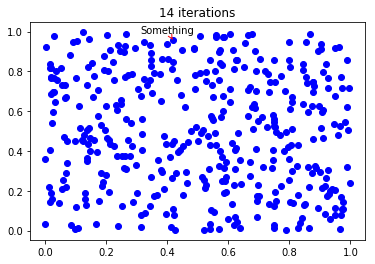

In [6]:
plot_scatter(adjust=True)

Here the number we see in the output is number of iteration the algorithm used to adjust the location of the text. The result is much better! The text almost doesn't overlap anything and is legible while clearly corresponding to one particular point.

#### A very simple example from http://stackoverflow.com/q/19073683/1304161, but I'll show some special tricks with it
First let's just create the data and plot it with no adjustment or anything. Then I will show how to restrict movement along one of the axes, repel text from the lina and some logic behind potential adjustment of parameters to make your plot look nicer.

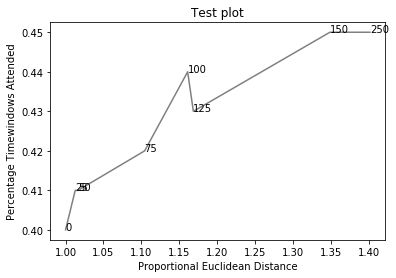

In [7]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()

text = [x for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
def plot_eucs_covers():
    plt.plot(eucs,covers,color="black", alpha=0.5)
    texts = []
    for xt, yt, s in zip(eucs, covers, text):
        texts.append(plt.text(xt, yt, s))

    plt.xlabel("Proportional Euclidean Distance")
    plt.ylabel("Percentage Timewindows Attended")
    plt.title("Test plot")
    return texts
_ = plot_eucs_covers()

Now let's just apply the text adjustment with all default parameters and define the arrow properties we like.

13

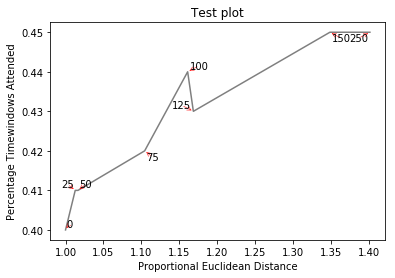

In [8]:
texts = plot_eucs_covers()
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

Now one of the labels overlays the line and two are very close to it, that's not pretty. We'll create some virtual points along the lines using linear interpolation to repel the labels from the graph itself.

8

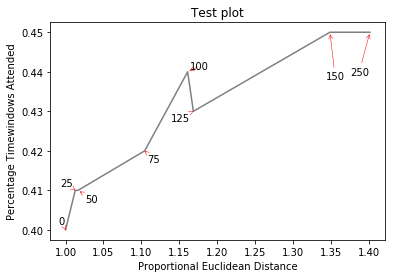

In [9]:
from scipy import interpolate
texts = plot_eucs_covers()
f = interpolate.interp1d(eucs, covers)
x = np.linspace(min(eucs), max(eucs), 1000)
y = f(x)
adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

Nice! But what if we don't want the labels to move along the x axis?

11

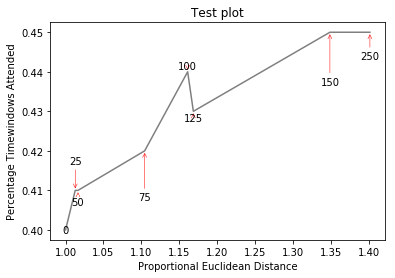

In [10]:
texts = plot_eucs_covers()
adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
            autoalign='y', only_move={'points':'y', 'text':'y'})

That's kind of OK, but let's see if we can get the texts to be more similar distance from the line! For that we need to expand text bounding box when repelling from points more (in our case we need to make it higher), but reduce the force of repelling from points - then the labels should end up further away from the points, but will move slower and won't fly away very far.

21

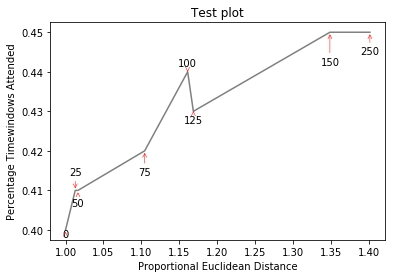

In [11]:
texts = plot_eucs_covers()
adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5), 
            autoalign='y', only_move={'points':'y', 'text':'y'},
            expand_points=(1.2, 1.75),
            force_points=0.1)

Now this is essentially perfect! Making the distance of labels to the line exactly right is difficult because of the artificial way we are repelling them and different shape of the line close to different labels.

###### Now a real-world example of a volcano plot
(idea and data from http://www.gettinggeneticsdone.com/2016/01/repel-overlapping-text-labels-in-ggplot2.html)

First let's just plot the data 

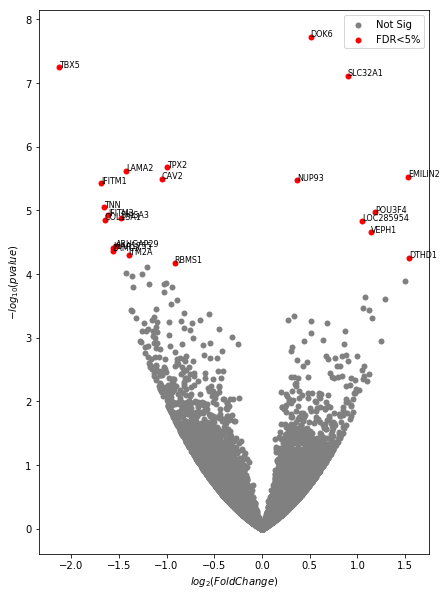

In [12]:
data = pd.read_csv('volcano_data.csv')
def plot_volcano(adjust=False):
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['log2FoldChange'][data['padj']>=threshold], -np.log10(data['pvalue'][data['padj']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['log2FoldChange'][data['padj']<threshold], -np.log10(data['pvalue'][data['padj']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Gene'][data['padj']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(pvalue)$')
    if adjust:
        plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5)))+' iterations')
_ = plot_volcano()

We can't read half of the labels in the left half! Let's adjust them :)

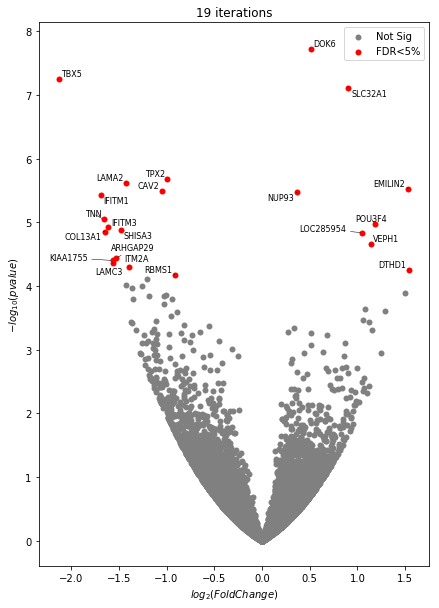

In [13]:
plot_volcano(adjust=True)

And this is very nice now!

#### Now a classical mtcars dataset; example from ggrepel package for R

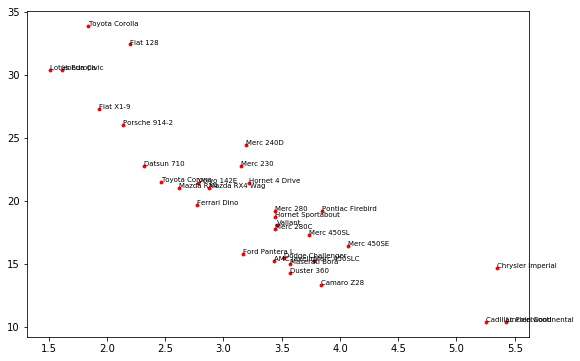

In [14]:
mtcars = pd.read_csv('mtcars.csv')
def plot_mtcars(adjust=False):
    plt.figure(figsize=(9, 6))
    plt.scatter(mtcars['wt'], mtcars['mpg'], s=15, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(mtcars['wt'], mtcars['mpg'], mtcars['Car']):
        texts.append(plt.text(x, y, s, size=7))
    if adjust:
        plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5)))+' iterations')
_ = plot_mtcars()

Aaa everything is overlapping!!! Crazy. Let's fix it.

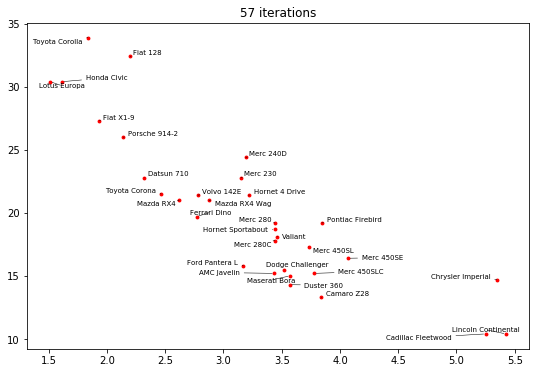

In [15]:
plot_mtcars(adjust=True)

Now this is pretty good for such a difficult case!

Note that I specified the figure size for two latter examples. Obviously, making it larger is one of the easiest ways to reduce overlaps, but often it is limited - that's when this library can help!

#### Example from http://stackoverflow.com/questions/14938541/how-to-improve-the-label-placement-for-matplotlib-scatter-chart-code-algorithm?noredirect=1&lq=1

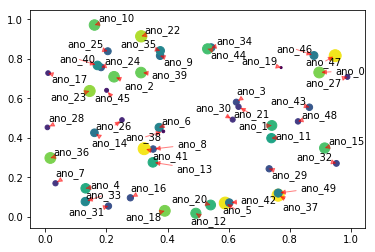

In [16]:
np.random.seed(2016)

N = 50
scatter_data = np.random.rand(N, 3)
fig, ax = plt.subplots()
bubbles = ax.scatter(scatter_data[:, 0], scatter_data[:, 1],
           c=scatter_data[:, 2], s=scatter_data[:, 2] * 150)
labels = ['ano_{}'.format(i) for i in range(N)]
texts = []
for x, y, text in zip(scatter_data[:, 0], scatter_data[:, 1], labels):
    texts.append(ax.text(x, y, text))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>",
                                                    color='r', alpha=0.5))
plt.show()

#### Now an example from https://blog.mafr.de/2012/03/11/time-series-data-with-matplotlib/ with adding labels

In [17]:
import matplotlib.dates as mdates
import locale
locale.setlocale(locale.LC_ALL,'en_GB.utf8') #I have it set to Russian, without this dates don't work

'en_GB.utf8'

In [18]:
days, impressions = np.loadtxt("page-impressions.csv", unpack=True,
        converters={ 0: mdates.bytespdate2num('%Y-%m-%d')})

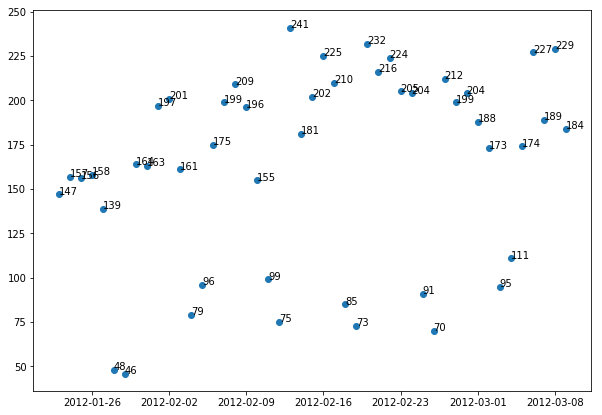

In [19]:
def plot_dates(adjust=False):
    plt.figure(figsize=(10, 7))
    plt.plot_date(x=days, y=impressions)
    texts = []
    for x, y in zip(days, impressions):
        texts.append(plt.text(x, y, int(y)))
    if adjust:
        plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5)))+' iterations')
plot_dates(adjust=False)

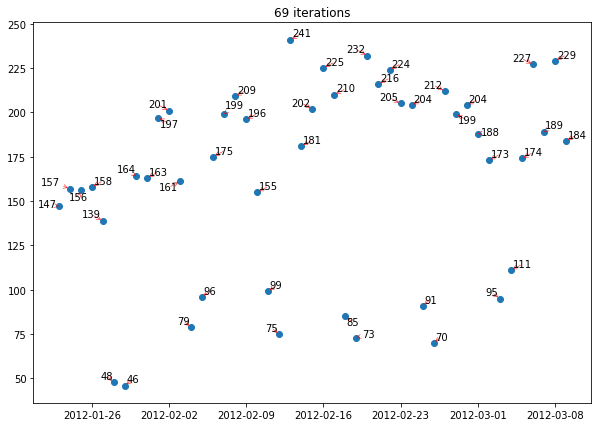

In [20]:
plot_dates(adjust=True)

#### An issue has been brought up in the repository about using the library for labelling bars above them
I recently added a feature to repel labels from any additional matplotlib objects, in this case bars, but can also be a legend, for example.

In [21]:
data = [{'rf': [[10, 0.682312925170068], [20, 0.714904143475572], [30, 0.729107400535972], [40, 0.718944547515976], [50, 0.7372706658420943], [60, 0.7291486291486291], [70, 0.7332302618016904], [80, 0.7291486291486291], [90, 0.7291486291486291]], 'besttree': 0.7372706658420943}, {'rf': [[10, 0.6576994434137291], [20, 0.6760874046588332], [30, 0.7086786229643371], [40, 0.6943929086786229], [50, 0.6984951556380127], [60, 0.6903731189445474], [70, 0.7025974025974027], [80, 0.7128014842300556], [90, 0.7086786229643373]], 'besttree': 0.7128014842300556}, {'rf': [[10, 0.5763347763347764], [20, 0.5783962069676354], [30, 0.5946402803545661], [40, 0.5988455988455988], [50, 0.6028653885796743], [60, 0.6089466089466089], [70, 0.6171098742527313], [80, 0.6130488559059988], [90, 0.6130488559059988]], 'besttree': 0.6171098742527313}, {'rf': [[10, 0.6741084312512883], [20, 0.7025767882910741], [30, 0.6964337250051535], [40, 0.7127396413110699], [50, 0.7167594310451453], [60, 0.712677798392084], [70, 0.7269635126777982], [80, 0.7351061636775922], [90, 0.7350855493712636]], 'besttree': 0.7351061636775922}, {'rf': [[10, 0.6719645433931148], [20, 0.7006184291898577], [30, 0.7066378066378066], [40, 0.7107606679035251], [50, 0.7086580086580087], [60, 0.7269841269841271], [70, 0.718841475984333], [80, 0.7249433106575964], [90, 0.7188827045969903]], 'besttree': 0.7269841269841271}, {'rf': [[10, 0.5722119150690579], [20, 0.5641723356009071], [30, 0.5845186559472274], [40, 0.5947227375798805], [50, 0.6048649762935477], [60, 0.6049062049062048], [70, 0.6048443619872191], [80, 0.6007833436404865], [90, 0.6048855905998763]], 'besttree': 0.6049062049062048}, {'rf': [[10, 0.54582560296846], [20, 0.5478664192949907], [30, 0.5499278499278499], [40, 0.564172335600907], [50, 0.5621109049680477], [60, 0.5621109049680478], [70, 0.5600700886415172], [80, 0.5580705009276438], [90, 0.5600907029478458]], 'besttree': 0.564172335600907}, {'rf': [[10, 0.6171304885590599], [20, 0.6435992578849722], [30, 0.6354566068851784], [40, 0.6577819006390435], [50, 0.6618429189857762], [60, 0.6557410843125129], [70, 0.6638425066996495], [80, 0.65578231292517], [90, 0.6618841475984334]], 'besttree': 0.6638425066996495}, {'rf': [[10, 0.6578643578643579], [20, 0.6944135229849515], [30, 0.69853638425067], [40, 0.7005565862708719], [50, 0.6985569985569986], [60, 0.6985363842506699], [70, 0.6964955679241392], [80, 0.6923933209647496], [90, 0.7005565862708719]], 'besttree': 0.7005565862708719}]

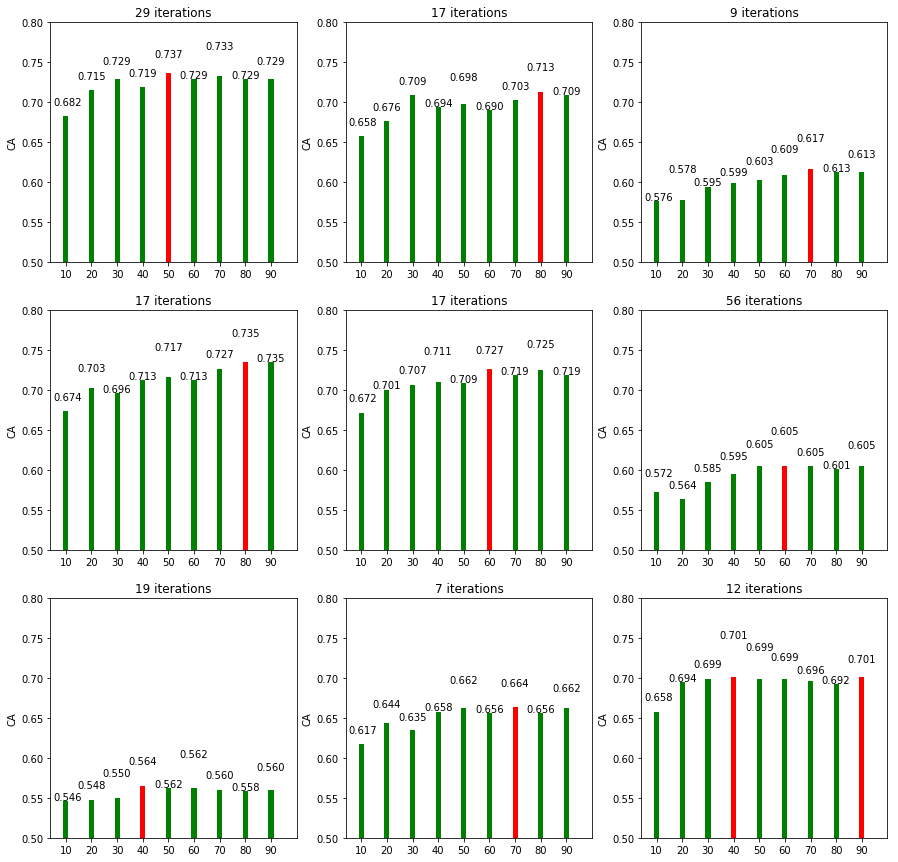

In [22]:
fig = plt.figure(facecolor="w",figsize=(15,15))
for i,result in enumerate(data):
# Let's plot the bars
    ax=fig.add_subplot(3,3,i+1)
    x = [item[0] for item in result['rf']]
    y = [item[1] for item in result['rf']]
    ax.axis(ymin=0.5,ymax=0.8,xmin=4,xmax=100)
    bars=ax.bar(x,y,color='green',tick_label=x,width=2)
# And add the labels, while changing the colour of some of the bars
    texts=[]
    for j,rect in enumerate(bars):
        left = rect.get_x()+1
        top = rect.get_y()+rect.get_height()+0.01
        texts.append(ax.text(left,top,'%.3f'%y[j]))
        if y[j] == result['besttree']:
            rect.set_facecolor('red')
            
# Now adjust the text. We don't want to move in the x direction and we want the labels to vertically aligned with the bars. I also noticed that having a stronger force to repel texts from ech other makes the figure nicer.
    ax.set_ylabel('CA')
    ax.set_title(str(adjust_text(texts, add_objects=bars,
                 autoalign='y', only_move={'points':'y', 'text':'y', 'objects':'y'},
                 ha='center', force_text=0.9))+' iterations')

Looks nice I think! I guess it can be quite a common use case.

#### Example with many thin bars from http://stackoverflow.com/questions/8850142/matplotlib-overlapping-annotations?noredirect=1&lq=1

33

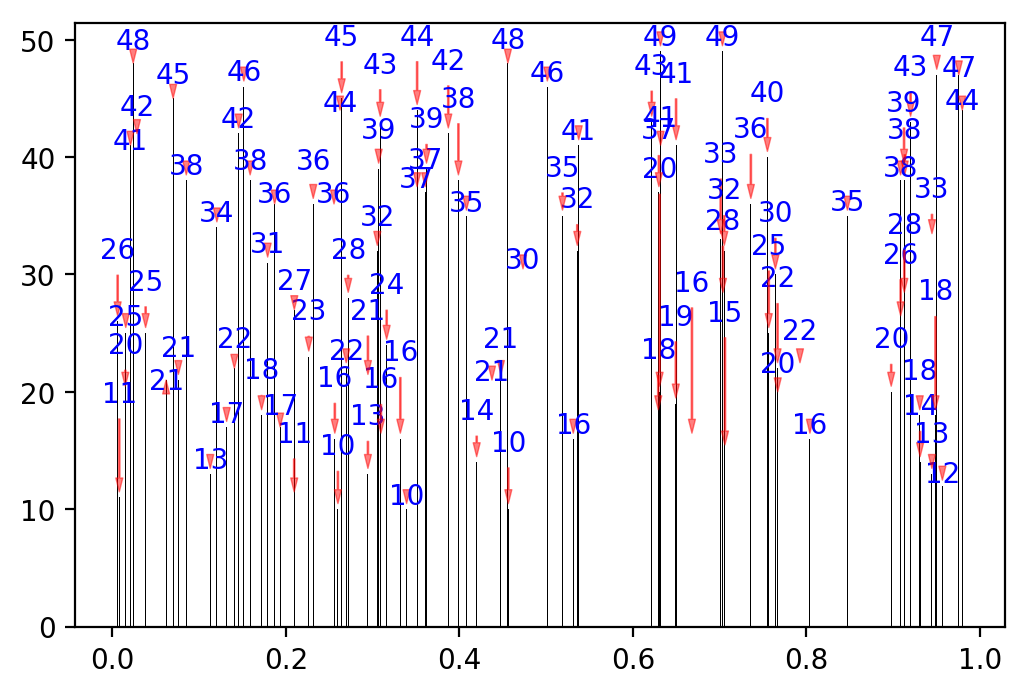

In [23]:
np.random.seed(2017)
x_data = np.random.random_sample(100)
y_data = np.random.randint(10,50,(100))

f, ax = plt.subplots(dpi=200)
bars = ax.bar(x_data, y_data, width=0.001, facecolor='k')
texts = []
for x, y in zip(x_data, y_data):
    texts.append(plt.text(x, y, y, color='b'))
adjust_text(texts, add_objects=bars, autoalign='y', expand_objects=(0.1, 1), text_from_points=False,
            only_move={'text':'y', 'objects':'y'}, force_text=0.75, force_objects=0.1,
            arrowprops=dict(arrowstyle="simple, head_width=0.25, tail_width=0.05", color='r', lw=0.5, alpha=0.5))

10

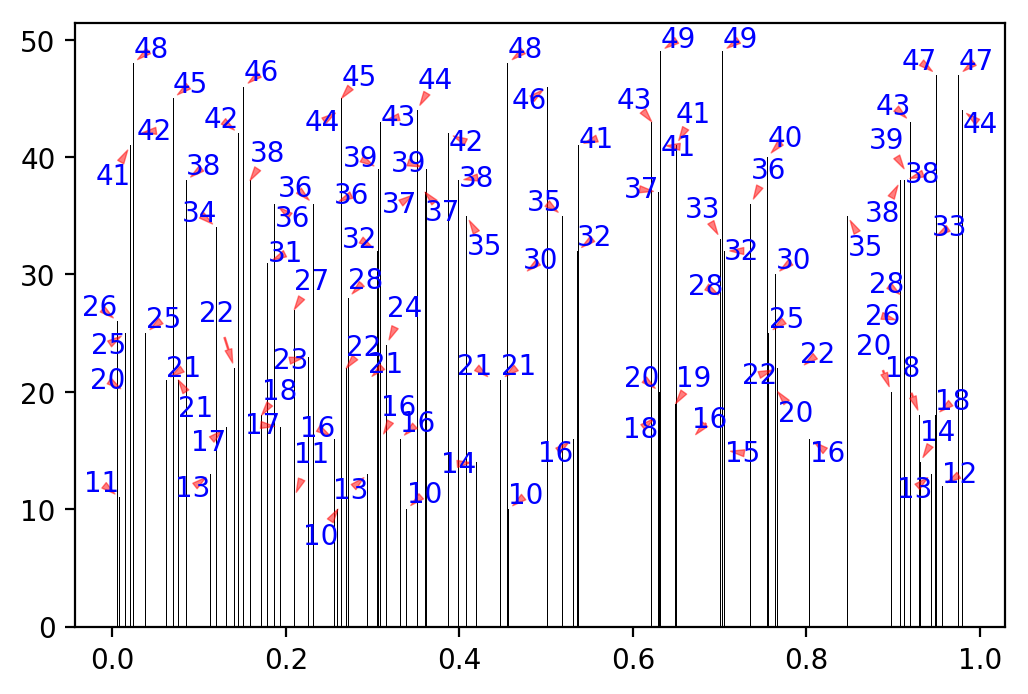

In [24]:
np.random.seed(2017)
x_data = np.random.random_sample(100)
y_data = np.random.randint(10,50,(100))

f, ax = plt.subplots(dpi=200)
bars = ax.bar(x_data, y_data, width=0.001, facecolor='k')
texts = []
for x, y in zip(x_data, y_data):
    texts.append(plt.text(x, y, y, color='b'))
adjust_text(texts, add_objects=bars, autoalign='xy', expand_objects=(0.1, 1), text_from_points=False,
            only_move={'text':'y', 'objects':'y'}, force_text=0.75, force_objects=0.1,
            arrowprops=dict(arrowstyle="simple, head_width=0.25, tail_width=0.05", color='r', lw=0.5, alpha=0.5))